In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

In [4]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query url
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
cities_list = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
country = []
date = []

counter = 0

print("Begin Data Retrieval")
print("------------------------------")
for city in cities:
    time.sleep(1)
    try:
        response = requests.get(query_url + city).json()
        cities_list.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response["main"]['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter += 1
        print(f"Processing Record {counter} | {city}")
    except KeyError:
        print(f"{city} not found... Skipping...")
        pass

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------") 

Processing Record 1 | taybad
Processing Record 2 | torbay
Processing Record 3 | talnakh
Processing Record 4 | saskylakh
Processing Record 5 | pevek
Processing Record 6 | cape town
Processing Record 7 | iskateley
Processing Record 8 | vaini
Processing Record 9 | airai
Processing Record 10 | san andres
Processing Record 11 | nantucket
Processing Record 12 | port alfred
Processing Record 13 | salym
Processing Record 14 | carnarvon
Processing Record 15 | pryozerne
Processing Record 16 | upernavik
Processing Record 17 | shuyskoye
Processing Record 18 | hilo
Processing Record 19 | coquimbo
Processing Record 20 | hofn
Processing Record 21 | angoche
Processing Record 22 | lanzhou
Processing Record 23 | erzin
Processing Record 24 | jamestown
Processing Record 25 | dingle
Processing Record 26 | cayenne
Processing Record 27 | ponta do sol
Processing Record 28 | rikitea
Processing Record 29 | bud
Processing Record 30 | belz
Processing Record 31 | prachuap khiri khan
Processing Record 32 | bitung
P

Processing Record 226 | gamba
Processing Record 227 | bentiu
Processing Record 228 | havoysund
Processing Record 229 | portland
Processing Record 230 | sardulgarh
Processing Record 231 | sydney mines
Processing Record 232 | matagami
Processing Record 233 | verkhoyansk
Processing Record 234 | kodinsk
Processing Record 235 | isangel
Processing Record 236 | bubaque
Processing Record 237 | rincon
dzhusaly not found... Skipping...
Processing Record 238 | rakkestad
Processing Record 239 | spasskoye
Processing Record 240 | kyra
Processing Record 241 | aitape
Processing Record 242 | dikson
Processing Record 243 | nanortalik
umzimvubu not found... Skipping...
Processing Record 244 | erenhot
Processing Record 245 | ust-tsilma
Processing Record 246 | paamiut
tabiauea not found... Skipping...
Processing Record 247 | sao jose da coroa grande
Processing Record 248 | geraldton
Processing Record 249 | richards bay
Processing Record 250 | santa barbara
Processing Record 251 | mier
Processing Record 252

Processing Record 452 | mayor pablo lagerenza
Processing Record 453 | macusani
Processing Record 454 | kailua
Processing Record 455 | pokrovsk
Processing Record 456 | jian
Processing Record 457 | strathpeffer
Processing Record 458 | topolobampo
Processing Record 459 | freeport
Processing Record 460 | arcata
Processing Record 461 | valdivia
hihifo not found... Skipping...
Processing Record 462 | nemuro
Processing Record 463 | bathsheba
Processing Record 464 | morgantown
Processing Record 465 | waipawa
Processing Record 466 | anchorage
Processing Record 467 | el alto
Processing Record 468 | urazovo
Processing Record 469 | girne
Processing Record 470 | lavrentiya
meilu not found... Skipping...
Processing Record 471 | saint-georges
Processing Record 472 | santiago
Processing Record 473 | suntar
Processing Record 474 | choix
Processing Record 475 | ilesha
Processing Record 476 | fortuna
Processing Record 477 | hulan
malwan not found... Skipping...
Processing Record 478 | adrar
Processing Re

In [10]:
cities_weather = pd.DataFrame({
    'City' : cities_list,
    'Latitude' : lat,
    'Longitude': lon,
    'Max Temp' : temp,
    'Humidity' : humidity,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date' : date
})
cities_weather.to_csv("Resources/cities_weather.csv")

In [17]:
cities_weather.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.757538,15.956145,49.418029,71.683241,56.869245,1.611770e+09
std,33.545137,91.912850,34.746973,21.495967,38.486345,2.048551e+02
min,-54.800000,-175.200000,-52.470000,5.000000,0.000000,1.611769e+09
25%,-7.287350,-65.314800,28.680000,63.000000,20.000000,1.611770e+09
50%,22.933300,19.026600,61.120000,78.000000,75.000000,1.611770e+09
75%,47.368300,98.981800,77.000000,87.000000,90.000000,1.611770e+09
max,78.218600,178.416700,102.200000,100.000000,100.000000,1.611770e+09


In [28]:
cities_weather.head()
# pd.to_datetime(1611769322, unit='s')
# Timestamp('2017-03-22 15:16:45')

Timestamp('2021-01-27 17:42:02')

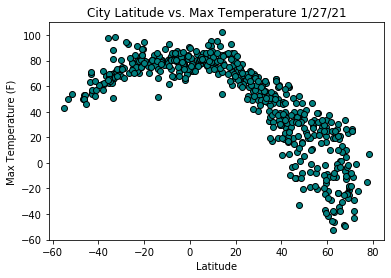

In [32]:
lat_x = cities_weather['Latitude']
temp_y = cities_weather['Max Temp']

plt.scatter(lat_x, temp_y,marker="o", facecolors="teal", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature 1/27/21")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.show()